In [12]:
from random import random,sample
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from haversine import haversine

In [13]:
def tsp_read(nodes):
    infile = open(nodes, 'r')
    content = infile.readline().strip().split()
    print("\nFile Name: ", content[2])

    while content[0] != 'NODE_COORD_SECTION':
        if(content[0] == 'DIMENSION'):
            dimension = content[2]
        content = infile.readline().strip().split()
    nodelist = []
    placelist = []
    print('Dimension', dimension)
    N = int(dimension)
    for i in range(0, N):
        x, y, z = infile.readline().strip().split()[:]
        nodelist.append([float(y), float(z)])
        placelist.append(x)
    
    infile.close()
    return nodelist, placelist

In [14]:
def euclidean_distance(nodes, n1, n2):
    distance = math.sqrt((nodes[n1][0]-nodes[n2][0])**2 + (nodes[n1][1]-nodes[n2][1])**2)
    return distance

In [15]:
def global_distance(nodes,n1,n2):
    distance = haversine((nodes[n1][0],nodes[n1][1]), (nodes[n2][0],nodes[n2][1]), unit='mi')
    return distance

In [16]:
def cooling_function(T):
    return T * 0.9999

In [62]:
def get_path_cost(dist, path):
    cost = 0
    length = len(path)
    for i in range(length):
        cost = cost + dist[path[i], path[(i+1) % length]]
    return cost

In [63]:
def simulated_annealing(nodes, dist, n):
    # Initial Path
    path = np.random.permutation(n)
    path_cost = get_path_cost(dist, path)
    initial_path = path
    print("Path cost before simulated annealing ", path_cost)
    iteration = 1000000
    temperature = 10000
    ran = 0.5
    for i in range(iteration):
        rev = sample(range(len(nodes)),2)
        newpath = path.copy()
        newpath[rev[0]:rev[1]+1] = newpath[rev[0]:rev[1]+1][::-1] # reverse sublist
        new_pathcost = get_path_cost(dist, newpath)
        
        delE = path_cost - new_pathcost
        try:
            prob = 1 / (1 + math.exp(-delE / temperature))
        except OverflowError:
            prob = 0
        if delE > 0:
            path = newpath.copy()
            path_cost = new_pathcost
        elif random() < prob:
            path = newpath.copy()
            path_cost = new_pathcost
        temperature = cooling_function(temperature)
        if(temperature < 1e-8):
            print("Iterations : ",i)
            break
    return path, path_cost, initial_path

In [64]:
def graph(nodes, path):
    X = []
    Y = []
    length = len(path)
    for i in range(length):
        X.append(nodes[path[i]][0])
        Y.append(nodes[path[i]][1])
    X.append(nodes[path[0]][0])
    Y.append(nodes[path[0]][1])
    plt.plot(X,Y)

In [60]:
def print_path(path,place):
    for i in range(len(path)):
        print(place[path[i]],"-->", end =" ")
    print(place[path[0]])


File Name:  Rajasthan
Dimension 20
Path cost before simulated annealing  3014.6145198105587
Iterations :  276296
Execution Time in milliseconds: 11782.6236 ms

Initial Path :
Shekhawati --> Ranthambore_National_Park --> Kota --> Bhangarh_Fort --> Pali --> Jaisalmer --> Bikaner --> Dechu --> Mount_Abu --> Bundi --> Jaipur --> Chittorgarh --> Udaipur --> Sariska_Tiger_Reserve --> Shakambari_Jheel --> Ajmer --> Bharatpur --> Jodhpur --> Neemrana --> Ranthambore_Fort --> Shekhawati
Best Path:
Jaisalmer --> Bikaner --> Shekhawati --> Shakambari_Jheel --> Ajmer --> Jaipur --> Bhangarh_Fort --> Sariska_Tiger_Reserve --> Neemrana --> Bharatpur --> Ranthambore_National_Park --> Ranthambore_Fort --> Kota --> Bundi --> Chittorgarh --> Udaipur --> Mount_Abu --> Pali --> Jodhpur --> Dechu --> Jaisalmer
Best Cost: 1297.0783650384117


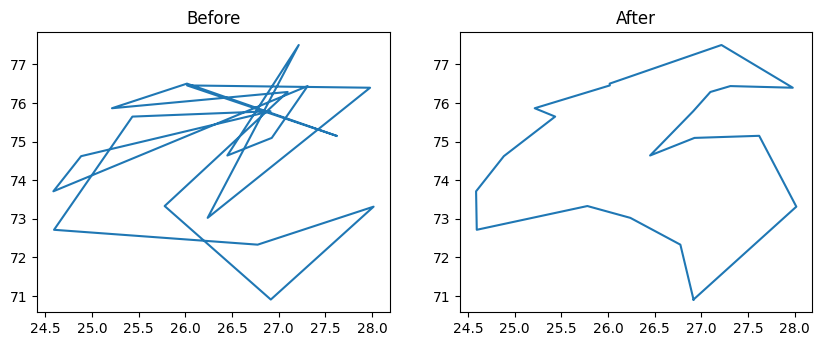


File Name:  xqf131
Dimension 131
Path cost before simulated annealing  4758.050982815813
Iterations :  276296
Execution Time in milliseconds: 51015.5461 ms

Initial Path :
53 --> 2 --> 40 --> 11 --> 33 --> 82 --> 61 --> 16 --> 51 --> 74 --> 19 --> 125 --> 18 --> 64 --> 126 --> 59 --> 93 --> 73 --> 15 --> 129 --> 48 --> 70 --> 89 --> 47 --> 78 --> 62 --> 23 --> 83 --> 109 --> 17 --> 9 --> 25 --> 28 --> 115 --> 79 --> 91 --> 1 --> 58 --> 119 --> 97 --> 92 --> 68 --> 120 --> 42 --> 39 --> 104 --> 86 --> 32 --> 26 --> 131 --> 67 --> 29 --> 113 --> 24 --> 7 --> 46 --> 76 --> 107 --> 102 --> 27 --> 100 --> 6 --> 5 --> 71 --> 81 --> 75 --> 30 --> 98 --> 50 --> 57 --> 99 --> 21 --> 84 --> 36 --> 116 --> 112 --> 69 --> 122 --> 90 --> 66 --> 101 --> 85 --> 103 --> 77 --> 13 --> 49 --> 105 --> 87 --> 34 --> 31 --> 96 --> 118 --> 127 --> 72 --> 94 --> 88 --> 38 --> 12 --> 55 --> 44 --> 52 --> 35 --> 56 --> 123 --> 20 --> 8 --> 14 --> 4 --> 95 --> 65 --> 124 --> 121 --> 54 --> 117 --> 114 --> 41 -

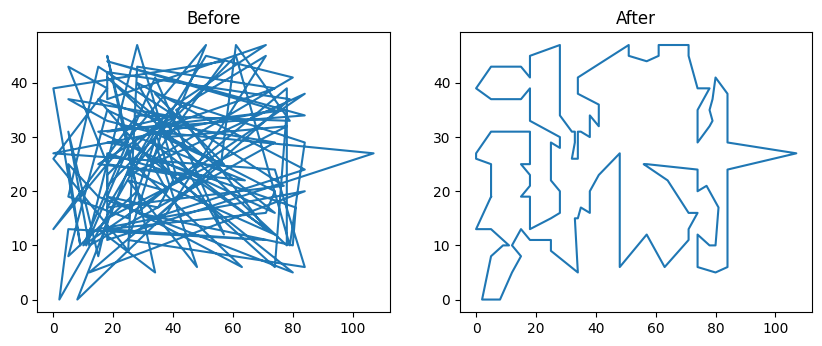

In [69]:
def main():
    datalist = [
        "Data/Rajasthan.tsp", 
        "Data/xqf131.tsp",
#         "Data/xqg237.tsp", 
#         "Data/pma343.tsp",
#         "Data/pka379.tsp",
#         "Data/bcl380.tsp",
#         "Data/pbl395.tsp",
#         "Data/pbk411.tsp",
#         "Data/pbn423.tsp",
#         "Data/pbm436.tsp",
#         "Data/xql662.tsp",
#         "Data/rbx711.tsp",
#         "Data/rbu737.tsp",
#         "Data/dkg813.tsp",
#         "Data/lim963.tsp",
#         "Data/pbd984.tsp",
#         "Data/xit1083.tsp",
#         "Data/dka1376.tsp",
#         "Data/dca1389.tsp",
#         "Data/dja1436.tsp",
#         "Data/icw1483.tsp"
    ]

    iterator = 1
    for d in datalist:
        nodes, place = tsp_read(d)
        coords = np.array(nodes) 
        n = len(coords)
        # Distance Array
        dist = np.zeros((n, n), dtype=float)

        for i in range(n):
            for j in range(i+1, n):
                if d == "Data/Rajasthan.tsp":
                    dist[i, j] = global_distance(nodes, i, j)
                else:
                    dist[i, j] = euclidean_distance(nodes, i, j)
                dist[j, i] = dist[i, j]

        start = time.time_ns()
        best_path, best_cost, initial_path = simulated_annealing(nodes, dist, n)
        end = time.time_ns()
        print('Execution Time in milliseconds:', (end-start)/1e6,"ms")
        print('\nInitial Path :' )
        print_path(initial_path,place)
        print('Best Path:')
        print_path(best_path,place)
        print('Best Cost:', best_cost)
        plt.figure(figsize = (10,8))
        plt.subplot(len(datalist), 2, iterator)
        graph(nodes, initial_path)
        plt.title("Before")
        iterator += 1
        plt.subplot(len(datalist), 2, iterator)
        graph(nodes, best_path)
        plt.title("After")
        iterator += 1
        plt.show()


if __name__ == "__main__":
    main()